In [1]:
import os


In [2]:
os.getcwd()

'C:\\Users\\anujd'

In [3]:
os.chdir("C:\\Users\\anujd\\Desktop\\DS\\My work\\Project")

In [4]:
os.getcwd()

'C:\\Users\\anujd\\Desktop\\DS\\My work\\Project'

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:

ld=pd.read_csv('loan_data_set.csv')

In [7]:
ld.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
ld.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
ld.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001579,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


# PREPROCESSING THE DATASET

In [11]:
ld.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
ld['LoanAmount'] =ld['LoanAmount'].fillna(ld['LoanAmount'].mean())
ld['Loan_Amount_Term']=ld['Loan_Amount_Term'].fillna(ld['Loan_Amount_Term'].mean())
ld['Credit_History']=ld['Credit_History'].fillna(ld['Credit_History'].mean())

In [13]:
ld['Gender']=ld["Gender"].fillna(ld["Gender"].mode()[0])
ld['Married']=ld["Married"].fillna(ld["Married"].mode()[0])
ld['Dependents']=ld["Dependents"].fillna(ld["Dependents"].mode()[0])
ld['Self_Employed']=ld["Self_Employed"].fillna(ld["Self_Employed"].mode()[0])

In [14]:
ld.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

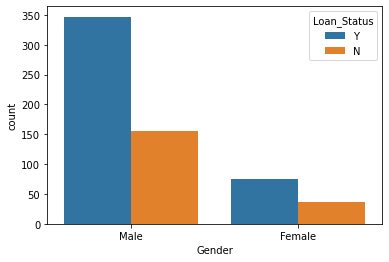

In [15]:
sns.countplot('Gender',hue='Loan_Status',data=ld)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

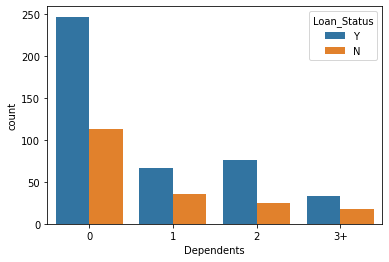

In [16]:
sns.countplot('Dependents',hue='Loan_Status',data=ld)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

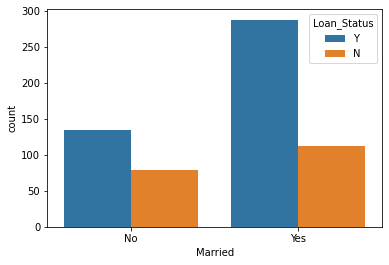

In [17]:
sns.countplot('Married',hue='Loan_Status',data=ld)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

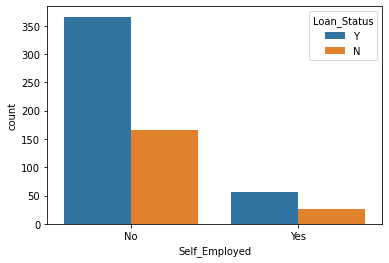

In [18]:
sns.countplot('Self_Employed',hue='Loan_Status',data=ld)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

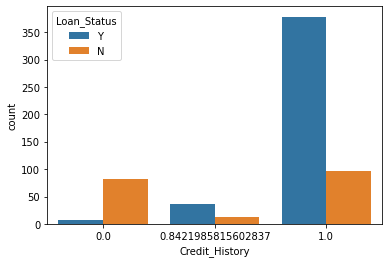

In [19]:
sns.countplot('Credit_History',hue='Loan_Status',data=ld)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

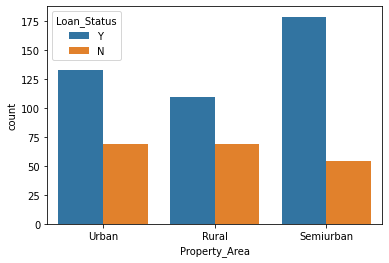

In [20]:
sns.countplot('Property_Area',hue='Loan_Status',data=ld)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

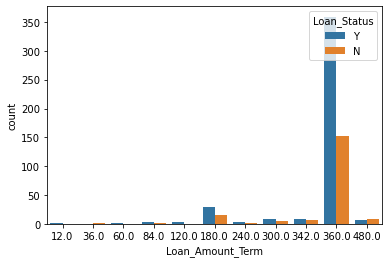

In [21]:
sns.countplot('Loan_Amount_Term',hue='Loan_Status',data=ld)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

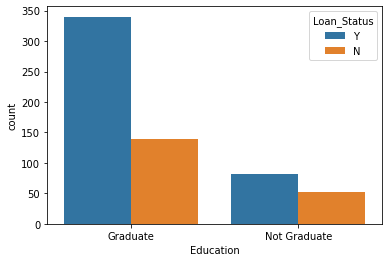

In [22]:
sns.countplot('Education',hue='Loan_Status',data=ld)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

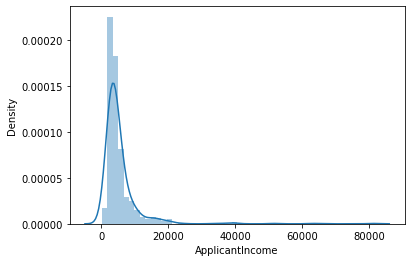

In [23]:
sns.distplot(ld['ApplicantIncome'])

In [24]:
ld['ApplicantIncome']=np.log(ld['ApplicantIncome'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

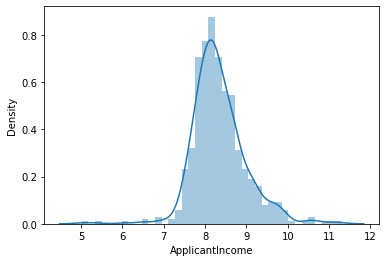

In [25]:
sns.distplot(ld['ApplicantIncome'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

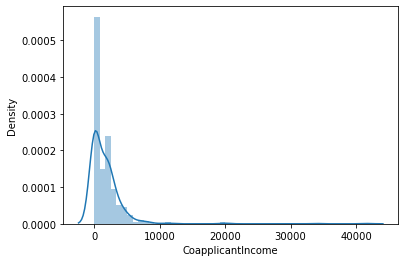

In [26]:
sns.distplot(ld['CoapplicantIncome'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

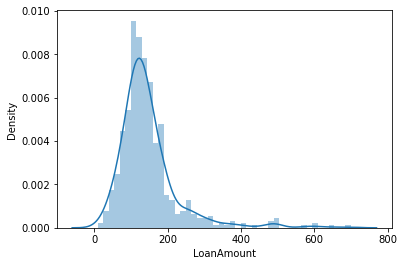

In [27]:
sns.distplot(ld['LoanAmount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

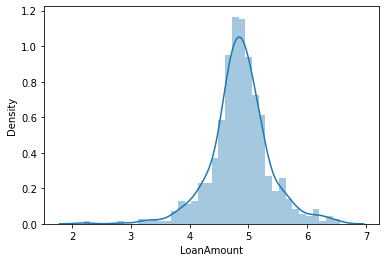

In [28]:
ld['LoanAmount']=np.log(ld['LoanAmount'])
sns.distplot(ld['LoanAmount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


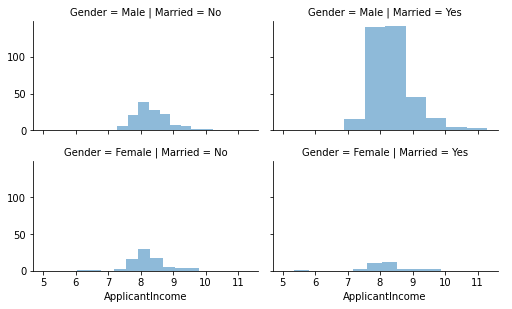

In [29]:
grid1=sns.FacetGrid(ld,row='Gender',col='Married',size=2.2,aspect=1.6)
grid1.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid1.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


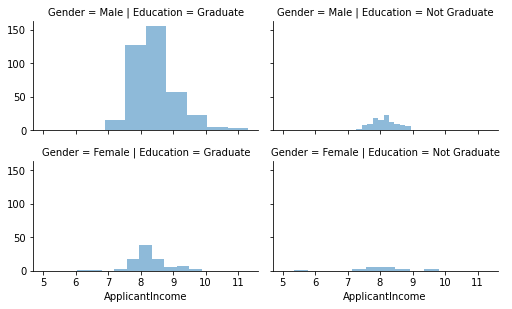

In [30]:
grid1=sns.FacetGrid(ld,row='Gender',col='Education',size=2.2,aspect=1.6)
grid1.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid1.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


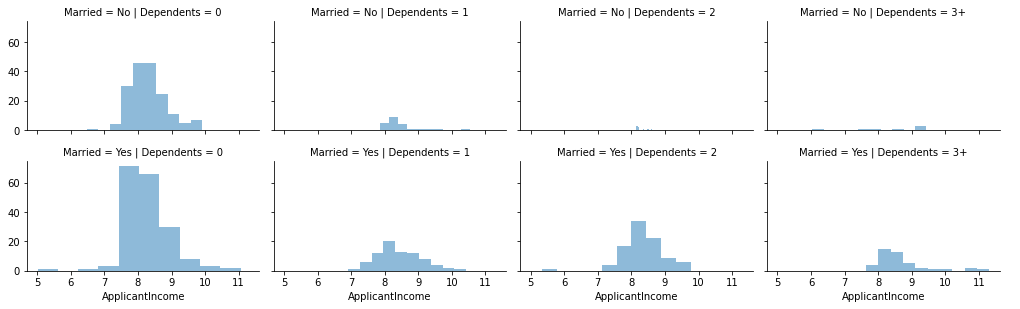

In [31]:
grid1=sns.FacetGrid(ld,row='Married',col='Dependents',size=2.2,aspect=1.6)
grid1.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid1.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


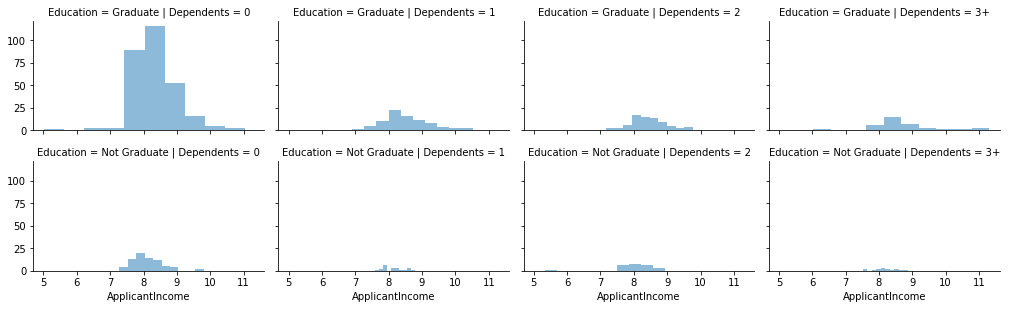

In [32]:
grid1=sns.FacetGrid(ld,row='Education',col='Dependents',size=2.2,aspect=1.6)
grid1.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid1.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


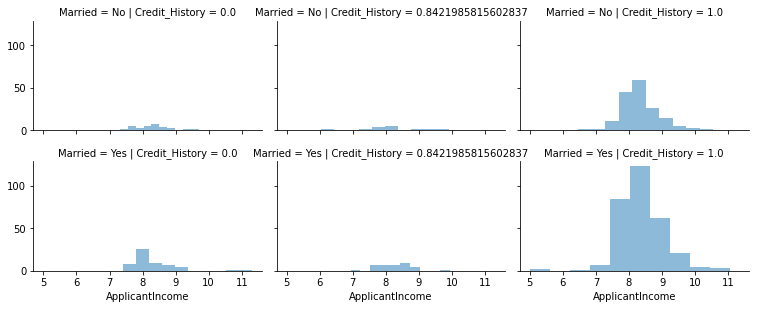

In [33]:
grid1=sns.FacetGrid(ld,row='Married',col='Credit_History',size=2.2,aspect=1.6)
grid1.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid1.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


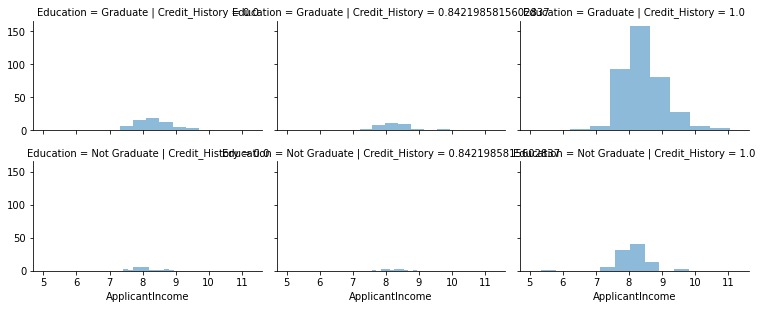

In [34]:
grid1=sns.FacetGrid(ld,row='Education',col='Credit_History',size=2.2,aspect=1.6)
grid1.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid1.add_legend()

In [35]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [36]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for col in cols:
    ld[col]=le.fit_transform(ld[col])

In [37]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(7), object(1)
memory usage: 45.7+ KB


In [38]:
ld.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.0,4.986426,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,1508.0,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.0,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,2358.0,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.0,4.948760,360.0,1.0,2,1


<AxesSubplot:>

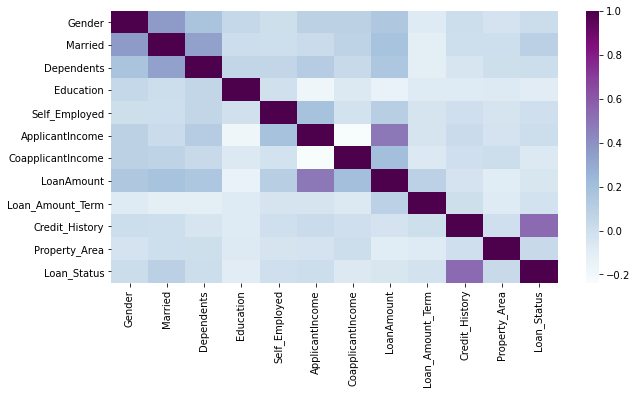

In [39]:
corr = ld
plt.figure(figsize=(10,5))
sns.heatmap(ld.corr(),cmap="BuPu")

In [40]:
X=ld.drop(columns=['Loan_Status','Loan_ID','CoapplicantIncome'],axis=1)
y=ld['Loan_Status']
X.head()
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# MODEL TRAINING

In [42]:
from sklearn.model_selection import cross_val_score
def classify(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    model.fit(X_train,y_train)
    print("Accuracy is",model.score(X_test,y_test)*100)
    score = cross_val_score(model,X,y,cv=5)
    print("Cross validation is",np.mean(score)*100)

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
classify(model,X,y)
model.fit(X_train,y_train)

Accuracy is 83.73983739837398
Cross validation is 80.78368652538984


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(random_state=0)

<AxesSubplot:>

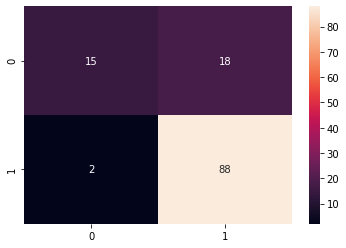

In [44]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm,annot=True)

In [45]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = model.predict_proba(X_test)

rf_probs = rf_probs[:, 1]

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

In [47]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [48]:
print('logistic (chance) Prediction: AUROC = %.3f' % (r_auc))
print('logistic: AUROC = %.3f' % (rf_auc))

logistic (chance) Prediction: AUROC = 0.500
logistic: AUROC = 0.738


In [49]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

In [50]:
import matplotlib.pyplot as plt

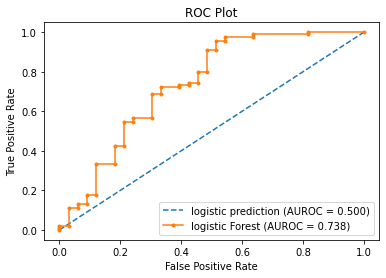

In [51]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='logistic prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='logistic Forest (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [52]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,X,y)
model.fit(X_train,y_train)

Accuracy is 72.35772357723577
Cross validation is 72.15513794482207


DecisionTreeClassifier()

In [53]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[21, 12],
       [29, 61]], dtype=int64)

<AxesSubplot:>

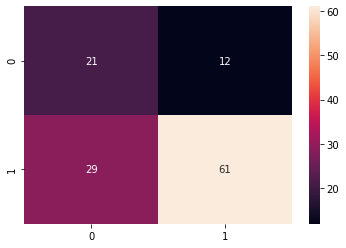

In [54]:
sns.heatmap(cm,annot=True)

In [55]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model,X,y)
model.fit(X_train,y_train)

Accuracy is 78.86178861788618
Cross validation is 78.50593096094896


RandomForestClassifier()

In [56]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14, 19],
       [ 9, 81]], dtype=int64)

<AxesSubplot:>

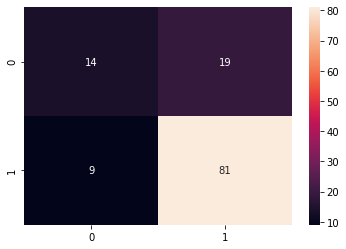

In [57]:
sns.heatmap(cm,annot=True)

#!pip3 install xgboost

In [58]:
pip install xgboost

In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [60]:
from xgboost import XGBClassifier
model = XGBClassifier()
eval_set=[(X_test,y_test)]
model.fit(X_train,y_train,early_stopping_rounds=10,eval_metric="logloss",eval_set=eval_set,verbose=True)

[0]	validation_0-logloss:0.59950
[1]	validation_0-logloss:0.55127
[2]	validation_0-logloss:0.51441
[3]	validation_0-logloss:0.49345
[4]	validation_0-logloss:0.48586
[5]	validation_0-logloss:0.48303
[6]	validation_0-logloss:0.48005
[7]	validation_0-logloss:0.47644
[8]	validation_0-logloss:0.47768
[9]	validation_0-logloss:0.49124
[10]	validation_0-logloss:0.49453
[11]	validation_0-logloss:0.49407


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12]	validation_0-logloss:0.49635
[13]	validation_0-logloss:0.50458
[14]	validation_0-logloss:0.51847
[15]	validation_0-logloss:0.51627
[16]	validation_0-logloss:0.51955


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
pred=model.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print("Accuracy:%.2f%%"% (accuracy *100.0))

Accuracy:82.11%


In [62]:
from xgboost import plot_importance
from matplotlib import pyplot

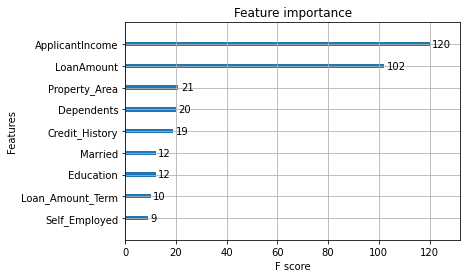

In [63]:
plot_importance(model)
pyplot.show()

# CONCLUSION

It can be seen clearly that after evaluation of four model the Logistic Regression performed better than Random forest,Decision Tree and Xgboost